In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.special import expit

In [3]:
#1.2 implementaion
data=np.loadtxt("ex2/data/ex2data1.txt",delimiter=",")
x=data[:,:2]
y=data[:,2:]
theta=np.zeros((x.shape[1],1))
print(theta.shape)
def H(x,theta):
    return expit(np.dot(x,theta))
def Cost(theta,x,y):
    hx=H(x,theta)
    s0=-y*np.log(hx)
    s1=(1.0-y)*np.log(1.0-hx)
    return np.mean(s0-s1)
print(Cost(theta,x,y))
newtheta=optimize.fmin(Cost,x0=theta,args=(x,y))
print(newtheta)
print(Cost(newtheta,x,y))
#result is worse than octave, but cannot figure out reason
def predict(x,y,theta):
    hx=H(x,theta)
    return hx>=0.5
print(predict(x,y,newtheta))


(2, 1)
0.6931471805599453
Optimization terminated successfully.
         Current function value: 0.673775
         Iterations: 23
         Function evaluations: 44
[0.00287047 0.00306158]
0.6737753846492688
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


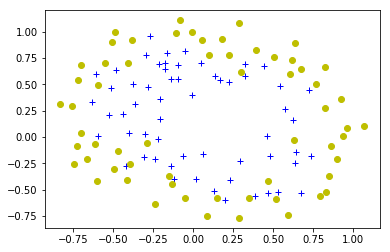

In [4]:
#2.1 visualizing the data
data=np.loadtxt("ex2/data/ex2data2.txt",delimiter=",")
x=data[:,:2]
y=data[:,2:]
m=x.shape[0]
ones=np.array([x[i] for i in range(m) if y[i][0]==1])
zeros=np.array([x[i] for i in range(m) if y[i][0]==0])
plt.plot(ones[:,0],ones[:,1],'b+')
plt.plot(zeros[:,0],zeros[:,1],'yo')
plt.show()

In [67]:
#2.2 feature mapping
k=0
features=np.zeros((m,28))
for i in range(7):
    for j in range(7-i):
        features[:,k]=np.power(x[:,0],i)*np.power(x[:,1],j)
        k+=1

lambda:  0


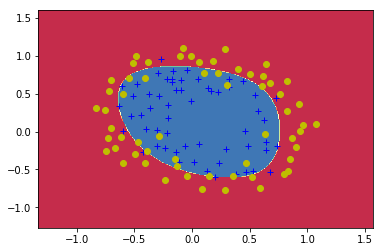

lambda:  0.1


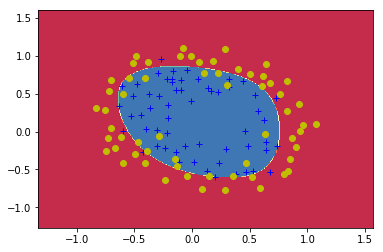

lambda:  1


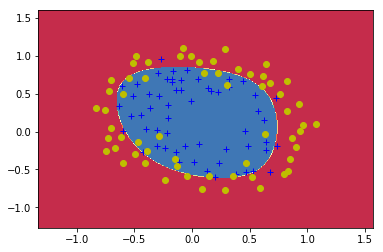

lambda:  10


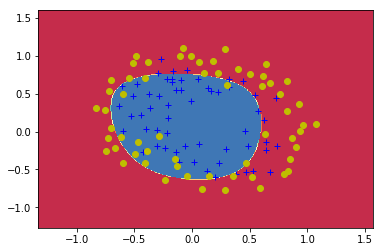

lambda:  100


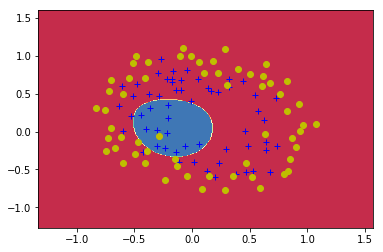

In [80]:
#2.3 cost function and gradient

iterations=1000
alpha=0.5
lambs=[0,0.1,1,10,100]
def H(x,theta):
    return expit(np.dot(x,theta))
def Cost(theta,x,y,lamb=0.0):
    hx=H(x,theta)
    s0=-y*np.log(hx)
    s1=(1.0-y)*np.log(1.0-hx)+lamb/x.shape[0]*np.sum(theta*theta)
    return np.mean(s0-s1)
#print(Cost(theta,features,y))
def Update(theta,x,y,alpha,lamb=0.0):
    hx=H(x,theta)
    theta_change=np.zeros(theta.shape)
    for i in range(theta.shape[0]):
        theta_change[i]=(np.mean((hx-y)*x[:,i].reshape(x.shape[0],1))+lamb/x.shape[0]*theta[i])*alpha
    return theta-theta_change*alpha
def Count(x,theta):
    k=0
    features=np.zeros((x.shape[0],28))
    for i in range(7):
        for j in range(7-i):
            features[:,k]=np.power(x[:,0],i)*np.power(x[:,1],j)
            k+=1
    return H(features,theta)
def Boundary(x,theta):
    x_min,x_max=x[:,0].min()-0.5, x[:,0].max()+0.5
    y_min,y_max=x[:,1].min()-.5,x[:,1].max()+0.5
    h = 0.01
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z=Count(np.c_[xx.ravel(), yy.ravel()],theta)
    for i in range(z.shape[0]):
        if(z[i][0]>=0.5):
            z[i][0]=1.0
        else:
            z[i][0]=0.0
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Spectral)
    #plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Spectral)
    ones=np.array([x[i] for i in range(m) if y[i][0]==1])
    zeros=np.array([x[i] for i in range(m) if y[i][0]==0])
    plt.plot(ones[:,0],ones[:,1],'b+')
    plt.plot(zeros[:,0],zeros[:,1],'yo')
    plt.show()
for item in lambs:
    print('lambda: ',item)
    cost_vals=np.zeros(iterations)
    theta=np.zeros((features.shape[1],1))
    for i in range(iterations):
        theta=Update(theta,features,y,alpha,item)
        #print(theta[0])
        cost_vals[i]=Cost(theta,features,y,item)
    Boundary(x,theta)